In [1]:
tasmia = "In the name of Allah, The most Benoficient, The most Merciful"
print(tasmia)

In the name of Allah, The most Benoficient, The most Merciful


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### Import Book Transactions Dataset

In [3]:
bt = pd.read_csv("bookstore_transactions.csv")
bt.head()

,Transaction
0,"History,Bookmark"
1,"History,Bookmark"
2,"Fiction,Bookmark"
3,"Biography,Bookmark"
4,"History,Bookmark"


In [4]:
# Check Data Information

bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  99 non-null     object
dtypes: object(1)
memory usage: 920.0+ bytes


### Data Preparation

In [5]:
# Split transactions strings into lists
transactions = bt["Transaction"].apply(lambda t: t.split(","))

# Convert DataFrame into list of strings
transactions = list(transactions)

**Count number of transactions that contain biography and fiction**

In [6]:
transactions.count(["History", "Bookmark"])

25

### Import Grocery Sales Data

In [7]:
groceries = pd.read_csv("grocery_sales.txt")
groceries.head()

,Transaction
0,"milk,bread,biscuit"
1,"bread,milk,biscuit,cereal"
2,"bread,tea"
3,"jam,bread,milk"
4,"tea,biscuit"


**Make list of lists**

In [8]:
transactions_grocery = groceries["Transaction"].apply(lambda t: t.split(","))
transactions_grocery = list(transactions_grocery)
transactions_grocery

[['milk', 'bread', 'biscuit'],
 ['bread', 'milk', 'biscuit', 'cereal'],
 ['bread', 'tea'],
 ['jam', 'bread', 'milk'],
 ['tea', 'biscuit'],
 ['bread', 'tea'],
 ['tea', 'cereal'],
 ['bread', 'tea', 'biscuit'],
 ['jam', 'bread', 'tea'],
 ['bread', 'milk'],
 ['coffee', 'orange', 'biscuit', 'cereal'],
 ['coffee', 'orange', 'biscuit', 'cereal'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['bread', 'sugar', 'biscuit'],
 ['coffee', 'sugar', 'cereal'],
 ['bread', 'sugar', 'biscuit'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['tea', 'milk', 'coffee', 'cereal']]

**Association Rules**

In [9]:
# Define the set of groceries
flattened = [i for t in transactions_grocery for i in t]
groceries = list(set(flattened))

# Generate all possible rules from groceries list
rules = list(permutations(groceries, 2))

# Print the set of rules
rules

[('coffee', 'milk'),
 ('coffee', 'jam'),
 ('coffee', 'orange'),
 ('coffee', 'cereal'),
 ('coffee', 'sugar'),
 ('coffee', 'biscuit'),
 ('coffee', 'tea'),
 ('coffee', 'bread'),
 ('milk', 'coffee'),
 ('milk', 'jam'),
 ('milk', 'orange'),
 ('milk', 'cereal'),
 ('milk', 'sugar'),
 ('milk', 'biscuit'),
 ('milk', 'tea'),
 ('milk', 'bread'),
 ('jam', 'coffee'),
 ('jam', 'milk'),
 ('jam', 'orange'),
 ('jam', 'cereal'),
 ('jam', 'sugar'),
 ('jam', 'biscuit'),
 ('jam', 'tea'),
 ('jam', 'bread'),
 ('orange', 'coffee'),
 ('orange', 'milk'),
 ('orange', 'jam'),
 ('orange', 'cereal'),
 ('orange', 'sugar'),
 ('orange', 'biscuit'),
 ('orange', 'tea'),
 ('orange', 'bread'),
 ('cereal', 'coffee'),
 ('cereal', 'milk'),
 ('cereal', 'jam'),
 ('cereal', 'orange'),
 ('cereal', 'sugar'),
 ('cereal', 'biscuit'),
 ('cereal', 'tea'),
 ('cereal', 'bread'),
 ('sugar', 'coffee'),
 ('sugar', 'milk'),
 ('sugar', 'jam'),
 ('sugar', 'orange'),
 ('sugar', 'cereal'),
 ('sugar', 'biscuit'),
 ('sugar', 'tea'),
 ('sugar', 'b

**Total Association Rules**

In [10]:
print(len(rules))

72


**One Hot Encoding**

In [11]:
# Initiate Transaction Encoder
encoder = TransactionEncoder().fit(transactions_grocery)

# One Hot Encode Itemsets by applying fit and transform
onehot = encoder.transform(transactions_grocery)

# Convert One Hot Encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

print(onehot)

    biscuit  bread  cereal  coffee    jam   milk  orange  sugar    tea
0      True   True   False   False  False   True   False  False  False
1      True   True    True   False  False   True   False  False  False
2     False   True   False   False  False  False   False  False   True
3     False   True   False   False   True   True   False  False  False
4      True  False   False   False  False  False   False  False   True
5     False   True   False   False  False  False   False  False   True
6     False  False    True   False  False  False   False  False   True
7      True   True   False   False  False  False   False  False   True
8     False   True   False   False   True  False   False  False   True
9     False   True   False   False  False   True   False  False  False
10     True  False    True    True  False  False    True  False  False
11     True  False    True    True  False  False    True  False  False
12    False  False   False    True  False  False   False   True  False
13    

**Support Metric**

In [12]:
onehot.mean().round(2)

biscuit    0.40
bread      0.65
cereal     0.30
coffee     0.40
jam        0.10
milk       0.25
orange     0.15
sugar      0.30
tea        0.35
dtype: float64

**Define dataset that contains biscuit and bread**

In [13]:
onehot["biscuit+bread"] = np.logical_and(onehot["biscuit"], onehot["bread"])
onehot.mean().round(2)

biscuit          0.40
bread            0.65
cereal           0.30
coffee           0.40
jam              0.10
milk             0.25
orange           0.15
sugar            0.30
tea              0.35
biscuit+bread    0.25
dtype: float64

### Import Books Dataset

In [14]:
br = pd.read_csv("Books.csv")
br.head()

,Hunger,Potter,Twilight
0,False,True,False
1,False,True,True
2,False,False,False
3,False,True,False
4,False,False,False


**Calculate Support**

In [15]:
# Compute support for Hunger and Potter
SupportHP = np.logical_and(br["Hunger"], br["Potter"]).mean()

# Compute support for Hunger and Twilight
SupportHT = np.logical_and(br["Hunger"], br["Twilight"]).mean()

# Compute support for Potter and Twilight
SupportPT = np.logical_and(br["Potter"], br["Twilight"]).mean()

print("Support for Hunger and Potter =", SupportHP.round(2), "\n")
print("Support for Hunger and Twilight =", SupportHT.round(2), "\n")
print("Support for Potter and Twilight =", SupportPT.round(2), "\n")

Support for Hunger and Potter = 0.12 

Support for Hunger and Twilight = 0.09 

Support for Potter and Twilight = 0.14 



**Refining Support with Confidence**

In [16]:
# Compute support for Potter and Twilight
SupportPT = np.logical_and(br["Potter"], br["Twilight"]).mean()

# Compute support for Potter
SupportP = br["Potter"].mean()

# Compute support for Twilight
SupportT = br["Twilight"].mean()

# Compute confidence for both rules
Confidence_PT = SupportPT / SupportP
Confidence_TP = SupportPT / SupportT

In [17]:
print("Confidence Potter ---> Twilight =", Confidence_PT.round(2), "\n")
print("Confidence Twilight ---> Potter =", Confidence_TP.round(2))

Confidence Potter ---> Twilight = 0.29 

Confidence Twilight ---> Potter = 0.55


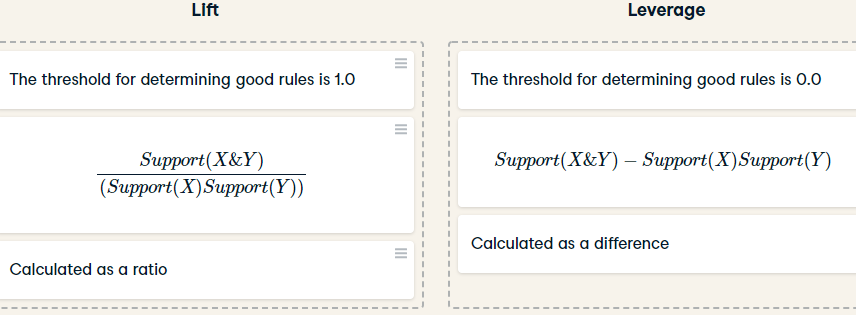

**Further refinement with lift**

In [18]:
lift = SupportPT / (SupportP * SupportT)
print("Lift =", lift.round(2))

Lift = 1.15


**Compute Leverage**

In [19]:
SupportTP = np.logical_and(br["Twilight"], br["Potter"]).mean()

leverage = SupportTP - (SupportT * SupportP)

leverage.round(2)

0.02

**Compute Conviction**

In [20]:
# Support Not Potter
SupportnP = 1 - SupportP

# Support Twilight minus Support (Potter-->Twilight)
SupportTnP = SupportT - SupportPT

# Compute Conviction'
conviction = (SupportT * SupportnP) / SupportTnP
conviction.round(2)

1.16

### Conviction Function

In [21]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [22]:
# Compute conviction for twilight -> potter and potter -> twilight
convictionTP = conviction(br["Twilight"], br["Potter"])
convictionPT = conviction(br["Potter"], br["Twilight"])

# Compute conviction for twilight -> hunger and hunger -> twilight
convictionTH = conviction(br["Twilight"], br["Hunger"])
convictionHT = conviction(br["Hunger"], br["Twilight"])

# Compute conviction for potter -> hunger and hunger -> potter
convictionPH = conviction(br["Potter"], br["Hunger"])
convictionHP = conviction(br["Hunger"], br["Potter"])

# Print results
print('Harry Potter -> Twilight: ', convictionPT)
print('Twilight -> Potter: ', convictionTP, "\n")

print('Twilight -> Hunger: ', convictionTH)
print('Hunger -> Twilight: ', convictionHT, "\n")

print('Harry Potter -> Hunger: ', convictionPH)
print('Hunger -> Harry Potter: ', convictionHP, "\n")

Harry Potter -> Twilight:  1.0534570072738598
Twilight -> Potter:  1.1550539077290998 

Twilight -> Hunger:  1.0432597415154545
Hunger -> Twilight:  1.0315274939515657 

Harry Potter -> Hunger:  0.9193054473816832
Hunger -> Harry Potter:  0.8538566213076668 



### Zhang Function

In [23]:
# Define a function to compute Zhang's metric

def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

In [24]:
# Compute zhang for twilight -> potter and potter -> twilight
zhangTP = zhang(br["Twilight"], br["Potter"])
zhangPT = zhang(br["Potter"], br["Twilight"])

# Compute conviction for twilight -> hunger and hunger -> twilight
zhangTH = zhang(br["Twilight"], br["Hunger"])
zhangHT = zhang(br["Hunger"], br["Twilight"])

# Compute conviction for potter -> hunger and hunger -> potter
zhangPH = zhang(br["Potter"], br["Hunger"])
zhangHP = zhang(br["Hunger"], br["Potter"])

# Print results
print('Harry Potter -> Twilight: ', zhangPT)
print('Twilight -> Potter: ', zhangTP, "\n")

print('Twilight -> Hunger: ', zhangTH)
print('Hunger -> Twilight: ', zhangHT, "\n")

print('Harry Potter -> Hunger: ', zhangPH)
print('Hunger -> Harry Potter: ', zhangHP, "\n")

Harry Potter -> Twilight:  0.24511760920374562
Twilight -> Potter:  0.17231567178855997 

Twilight -> Hunger:  0.10935743194389685
Hunger -> Twilight:  0.11937338356510399 

Harry Potter -> Hunger:  -0.30604947931146775
Hunger -> Harry Potter:  -0.25285758994840396 



### Aggregation

In [25]:
df_or = pd.read_csv("online_retail.csv")
df_or.head()

,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)


In [26]:
df_or_hot = pd.get_dummies(df_or["Description"])

In [27]:
df_or_hot

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def aggregate(item):
    # Select the column headers for sign items in onehot
    item_headers = [i for i in df_or_hot.columns if i.lower().find(item)>=0]

    # Select columns of sign items
    item_columns = df_or_hot[item_headers]

    # Return category of aggregated items
    return item_columns.sum(axis = 1) >= 1.0

# Aggregate items for the bags, boxes, and candles categories  
bags = aggregate('bag')
boxes = aggregate('box')
candles = aggregate("candle")
sign = aggregate("sign")

In [29]:
print("Share of Bags =", bags.mean().round(4), "\n")
print("Share of Boxes =", boxes.mean().round(4), "\n")
print("Share of Candles =", candles.mean().round(4), "\n")
print("Share of Sign =", sign.mean().round(4), "\n")

Share of Bags = 0.0946 

Share of Boxes = 0.0516 

Share of Candles = 0.0209 

Share of Sign = 0.0819 



In [30]:
df_or_hot_slice = df_or_hot.iloc[:, 0:500]

### Apriori Impletation

In [31]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot,
                            min_support = 0.0006, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets

,support,itemsets
0,0.40,(biscuit)
1,0.65,(bread)
2,0.30,(cereal)
3,0.40,(coffee)
4,0.10,(jam)
...,...,...
66,0.05,"(coffee, cereal, sugar)"
67,0.05,"(coffee, cereal, tea)"
68,0.05,"(milk, cereal, tea)"
69,0.05,"(milk, biscuit+bread, cereal)"


In [32]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.05, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                         	min_threshold = 1.5)

# Print association rules
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0          (orange)        (biscuit)                0.15                0.40   
1         (biscuit)         (orange)                0.40                0.15   
2   (biscuit+bread)        (biscuit)                0.25                0.40   
3         (biscuit)  (biscuit+bread)                0.40                0.25   
4             (jam)          (bread)                0.10                0.65   
5           (bread)            (jam)                0.65                0.10   
6   (biscuit+bread)          (bread)                0.25                0.65   
7           (bread)  (biscuit+bread)                0.65                0.25   
8          (coffee)         (cereal)                0.40                0.30   
9          (cereal)         (coffee)                0.30                0.40   
10         (orange)         (cereal)                0.15                0.30   
11         (cereal)         (orange)    

**Confidence with Apriori**

In [33]:
# Import the association rules function
from mlxtend.frequent_patterns import apriori, association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                         	min_threshold = 0.9)

# Print association rules
print(rules)

                 antecedents       consequents  antecedent support  \
0            (biscuit+bread)         (biscuit)                0.25   
1                      (jam)           (bread)                0.10   
2            (biscuit+bread)           (bread)                0.25   
3                   (orange)          (coffee)                0.15   
4            (cereal, bread)         (biscuit)                0.05   
5            (milk, biscuit)           (bread)                0.10   
6           (biscuit, sugar)           (bread)                0.10   
7   (biscuit+bread, biscuit)           (bread)                0.25   
8     (biscuit+bread, bread)         (biscuit)                0.25   
9           (biscuit, bread)   (biscuit+bread)                0.25   
10           (biscuit+bread)  (biscuit, bread)                0.25   
11         (biscuit, coffee)          (cereal)                0.10   
12         (orange, biscuit)          (cereal)                0.10   
13          (orange,

**Advanced Apriori results pruning**

In [34]:
onehot.head()

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea,biscuit+bread
0,True,True,False,False,False,True,False,False,False,True
1,True,True,True,False,False,True,False,False,False,True
2,False,True,False,False,False,False,False,False,True,False
3,False,True,False,False,True,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False


In [35]:
frequent_itemsets = apriori(onehot, 
                            use_colnames = True,
                            min_support = 0.3)
print(frequent_itemsets)

   support   itemsets
0     0.40  (biscuit)
1     0.65    (bread)
2     0.30   (cereal)
3     0.40   (coffee)
4     0.30    (sugar)
5     0.35      (tea)


### Gift Store Data

In [36]:
gsd = pd.read_excel("Aggregated.xlsx")
gsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bag     371 non-null    bool 
 1   box     371 non-null    bool 
 2   candle  371 non-null    bool 
 3   sign    371 non-null    bool 
dtypes: bool(4)
memory usage: 1.6 KB


**Apply the apriori algorithm with a minimum support of 0.0001**

In [37]:
frequent_itemsets = apriori(gsd,
                            min_support = 0.0001,
                            use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.466307,(bag)
1,0.256065,(box)
2,0.088949,(candle)
3,0.355795,(sign)
4,0.021563,"(bag, box)"
5,0.010782,"(bag, candle)"
6,0.097035,"(sign, bag)"
7,0.016173,"(candle, box)"
8,0.018868,"(sign, box)"
9,0.008086,"(sign, candle)"


**Generate the initial set of rules using a minimum support of 0.0001**

In [38]:
initial_rules = association_rules(frequent_itemsets,
                                  metric = "support",
                                  min_threshold = 0.0001)
initial_rules                                  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bag),(box),0.466307,0.256065,0.021563,0.046243,0.180590,-0.097841,0.780005
1,(box),(bag),0.256065,0.466307,0.021563,0.084211,0.180590,-0.097841,0.582768
2,(bag),(candle),0.466307,0.088949,0.010782,0.023121,0.259940,-0.030696,0.932615
3,(candle),(bag),0.088949,0.466307,0.010782,0.121212,0.259940,-0.030696,0.607306
4,(sign),(bag),0.355795,0.466307,0.097035,0.272727,0.584866,-0.068875,0.733827
5,(bag),(sign),0.466307,0.355795,0.097035,0.208092,0.584866,-0.068875,0.813485
6,(candle),(box),0.088949,0.256065,0.016173,0.181818,0.710048,-0.006604,0.909254
7,(box),(candle),0.256065,0.088949,0.016173,0.063158,0.710048,-0.006604,0.972470
8,(sign),(box),0.355795,0.256065,0.018868,0.053030,0.207097,-0.072239,0.785596
9,(box),(sign),0.256065,0.355795,0.018868,0.073684,0.207097,-0.072239,0.695448


**Set minimum antecedent support to 0.35**

In [39]:
rules = initial_rules[initial_rules["antecedent support"] > 0.35]
rules = initial_rules[initial_rules["consequent support"] < 0.35]
pd.DataFrame(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bag),(box),0.466307,0.256065,0.021563,0.046243,0.180590,-0.097841,0.780005
2,(bag),(candle),0.466307,0.088949,0.010782,0.023121,0.259940,-0.030696,0.932615
6,(candle),(box),0.088949,0.256065,0.016173,0.181818,0.710048,-0.006604,0.909254
7,(box),(candle),0.256065,0.088949,0.016173,0.063158,0.710048,-0.006604,0.972470
8,(sign),(box),0.355795,0.256065,0.018868,0.053030,0.207097,-0.072239,0.785596
10,(sign),(candle),0.355795,0.088949,0.008086,0.022727,0.255510,-0.023561,0.932238
12,"(sign, bag)",(candle),0.097035,0.088949,0.005391,0.055556,0.624579,-0.003240,0.964642
15,(sign),"(bag, candle)",0.355795,0.010782,0.005391,0.015152,1.405303,0.001555,1.004437
16,(bag),"(sign, candle)",0.466307,0.008086,0.005391,0.011561,1.429672,0.001620,1.003515
17,(candle),"(sign, bag)",0.088949,0.097035,0.005391,0.060606,0.624579,-0.003240,0.961221


**Zhangs Rule**

In [40]:
# Generate the initial set of rules using a minimum lift of 1.00
lift_rules = association_rules(frequent_itemsets,
                               metric = "lift",
                               min_threshold = 1.00)
lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(sign, candle)",(bag),0.008086,0.466307,0.005391,0.666667,1.429672,0.001620,1.601078
1,"(bag, candle)",(sign),0.010782,0.355795,0.005391,0.500000,1.405303,0.001555,1.288410
2,(sign),"(bag, candle)",0.355795,0.010782,0.005391,0.015152,1.405303,0.001555,1.004437
3,(bag),"(sign, candle)",0.466307,0.008086,0.005391,0.011561,1.429672,0.001620,1.003515


In [41]:
# Set antecedent support to 0.005
rules = lift_rules[lift_rules["antecedent support"] > 0.05]
rules = lift_rules[lift_rules["consequent support"] < 0.05]

**Advanced filtering with multiple metrics**

In [42]:
# Apply the Apriori algorithm with a minimum support threshold of 0.001
frequent_itemsets = apriori(gsd,
                            min_support = 0.001,
                            use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.466307,(bag)
1,0.256065,(box)
2,0.088949,(candle)
3,0.355795,(sign)
4,0.021563,"(bag, box)"
5,0.010782,"(bag, candle)"
6,0.097035,"(sign, bag)"
7,0.016173,"(candle, box)"
8,0.018868,"(sign, box)"
9,0.008086,"(sign, candle)"


**Recover association rules using a minium support threshold of 0.001**

In [43]:
rules = association_rules(frequent_itemsets,
                          metric = "support",
                          min_threshold = 0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bag),(box),0.466307,0.256065,0.021563,0.046243,0.180590,-0.097841,0.780005
1,(box),(bag),0.256065,0.466307,0.021563,0.084211,0.180590,-0.097841,0.582768
2,(bag),(candle),0.466307,0.088949,0.010782,0.023121,0.259940,-0.030696,0.932615
3,(candle),(bag),0.088949,0.466307,0.010782,0.121212,0.259940,-0.030696,0.607306
4,(sign),(bag),0.355795,0.466307,0.097035,0.272727,0.584866,-0.068875,0.733827
5,(bag),(sign),0.466307,0.355795,0.097035,0.208092,0.584866,-0.068875,0.813485
6,(candle),(box),0.088949,0.256065,0.016173,0.181818,0.710048,-0.006604,0.909254
7,(box),(candle),0.256065,0.088949,0.016173,0.063158,0.710048,-0.006604,0.972470
8,(sign),(box),0.355795,0.256065,0.018868,0.053030,0.207097,-0.072239,0.785596
9,(box),(sign),0.256065,0.355795,0.018868,0.073684,0.207097,-0.072239,0.695448


In [44]:
# Apply a 0.2 antecedent support threshold, 0.1 confidence threshold, and 0.50 lift threshold
frequent_rules = rules[(rules["antecedent support"] > 0.2) &
                       (rules["consequent support"] > 0.2) &
                       (rules["confidence"] > 0.1) &
                       (rules["lift"] > 0.5)]
frequent_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(sign),(bag),0.355795,0.466307,0.097035,0.272727,0.584866,-0.068875,0.733827
5,(bag),(sign),0.466307,0.355795,0.097035,0.208092,0.584866,-0.068875,0.813485


### Heatmaps

In [45]:
ratings = pd.read_csv("movielens_movies.csv")
ratings.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
